In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this EDA, we are looking at a section of the full data, this is due to the size of the full data being too large. 

In [14]:
df = pd.read_csv("results.csv")
df.head()

id   tdrift  tdrift50  tdrift10       rea           dcr  peakindex  \
0  2395098   76.923      38.5       7.7  0.874645  1.398707e+06       1044   
1  2395099   98.901      49.5       9.9  0.889023  1.030153e+06       1059   
2  2395100   99.900      50.0      10.0  1.146877  6.824150e+05       1060   
3  2395101  109.890      55.0      11.0  1.457592  2.992260e+05       1040   
4  2395102  134.865      67.5      13.5  0.536229  8.650850e+04       1059   

   peakvalue  tailslope  currentamp      lfpr      lq80  areagrowthrate  \
0     2977.0  -0.270887    0.006716  0.019371  170559.0      -1343364.0   
1     2227.0  -0.204239    0.006828  0.018125  166193.0       -979597.5   
2     1559.0  -0.137082    0.004727  0.021714  137823.0       -673188.0   
3      650.0  -0.055987    0.006738  0.022174   61560.0       -270538.0   
4      204.0  -0.014551    0.003731  0.017800   50606.0        -69706.0   

   inflection point  risingedgeslope  energylabel  highavse  lowavse  truedcr  \
0               355        44.602214  1167.174731      True     True     True   
1               346        26.065281   870.765543      True     True     True   
2               290        15.717048   582.980526      True     True     True   
3               291         5.180344   238.918902      True     True     True   
4               355         1.562540   214.491195      True     True     True   

      lq  
0   True  
1  False  
2   True  
3   True  
4   True

In [15]:
df.shape

(65000, 20)

In [16]:
df.dtypes

id                    int64
tdrift              float64
tdrift50            float64
tdrift10            float64
rea                 float64
dcr                 float64
peakindex             int64
peakvalue           float64
tailslope           float64
currentamp          float64
lfpr                float64
lq80                float64
areagrowthrate      float64
inflection point      int64
risingedgeslope     float64
energylabel         float64
highavse               bool
lowavse                bool
truedcr                bool
lq                     bool
dtype: object

In [17]:
#Drop missing values 
df = df.dropna()

Since our target variable is energy label, we will not need the binary variables such as high/low avse, truedcr as well as lq. 

In [18]:
unneeded_cols = ['highavse',  'lowavse', 'truedcr', 'lq']
df = df.drop(unneeded_cols, axis=1)

In [19]:
df.head()

id   tdrift  tdrift50  tdrift10       rea           dcr  peakindex  \
0  2395098   76.923      38.5       7.7  0.874645  1.398707e+06       1044   
1  2395099   98.901      49.5       9.9  0.889023  1.030153e+06       1059   
2  2395100   99.900      50.0      10.0  1.146877  6.824150e+05       1060   
3  2395101  109.890      55.0      11.0  1.457592  2.992260e+05       1040   
4  2395102  134.865      67.5      13.5  0.536229  8.650850e+04       1059   

   peakvalue  tailslope  currentamp      lfpr      lq80  areagrowthrate  \
0     2977.0  -0.270887    0.006716  0.019371  170559.0      -1343364.0   
1     2227.0  -0.204239    0.006828  0.018125  166193.0       -979597.5   
2     1559.0  -0.137082    0.004727  0.021714  137823.0       -673188.0   
3      650.0  -0.055987    0.006738  0.022174   61560.0       -270538.0   
4      204.0  -0.014551    0.003731  0.017800   50606.0        -69706.0   

   inflection point  risingedgeslope  energylabel  
0               355        44.602214  1167.174731  
1               346        26.065281   870.765543  
2               290        15.717048   582.980526  
3               291         5.180344   238.918902  
4               355         1.562540   214.491195

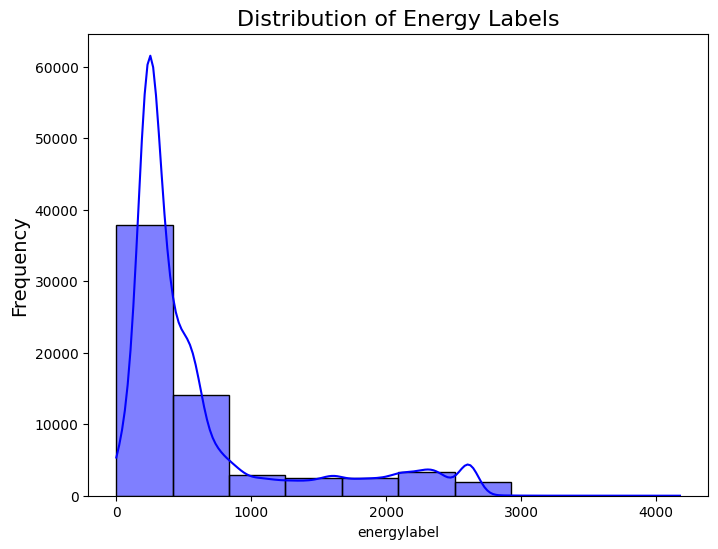

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['energylabel'], kde=True, bins=10, color='blue')
plt.title(f"Distribution of Energy Labels", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.show()

Here we can see that the distribution of energy labels (our target variable) to be right skewed. 

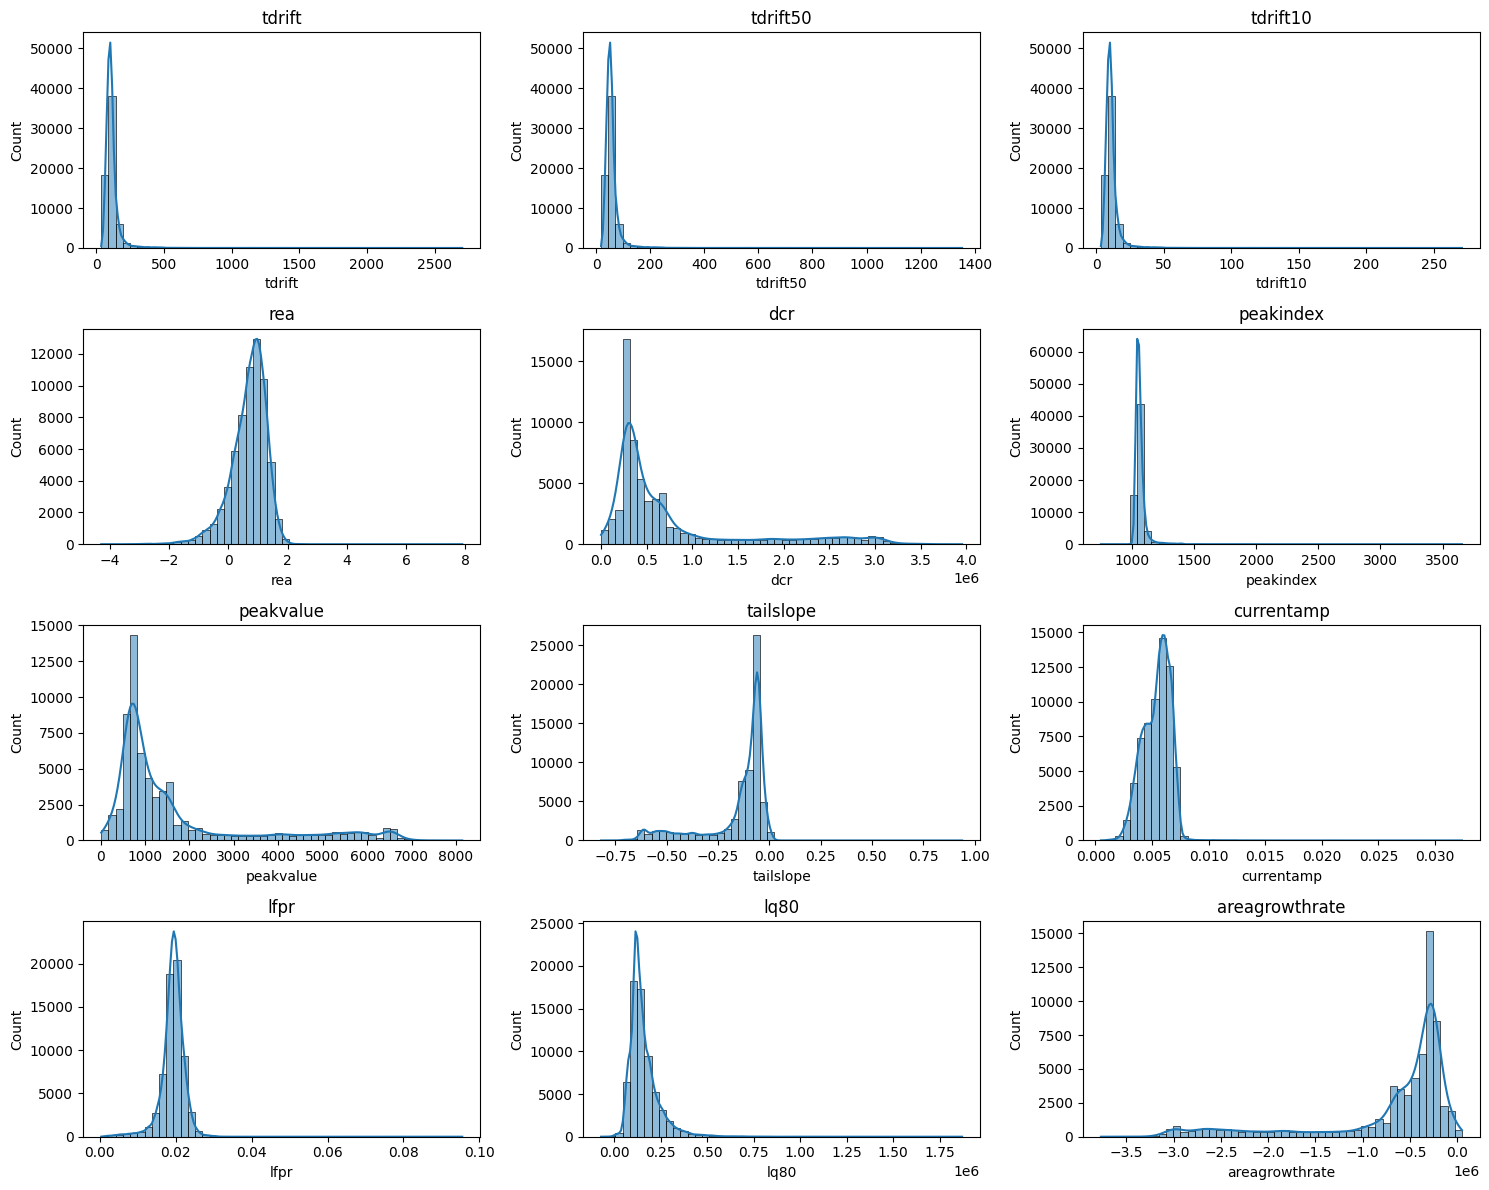

In [21]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove("energylabel")
num_cols.remove("id")

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:12]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
first_5000_df = df.head(5000)

Due to the large data size, the data analysed in this EDA will be limited to 5,000 in order to reduce run time.

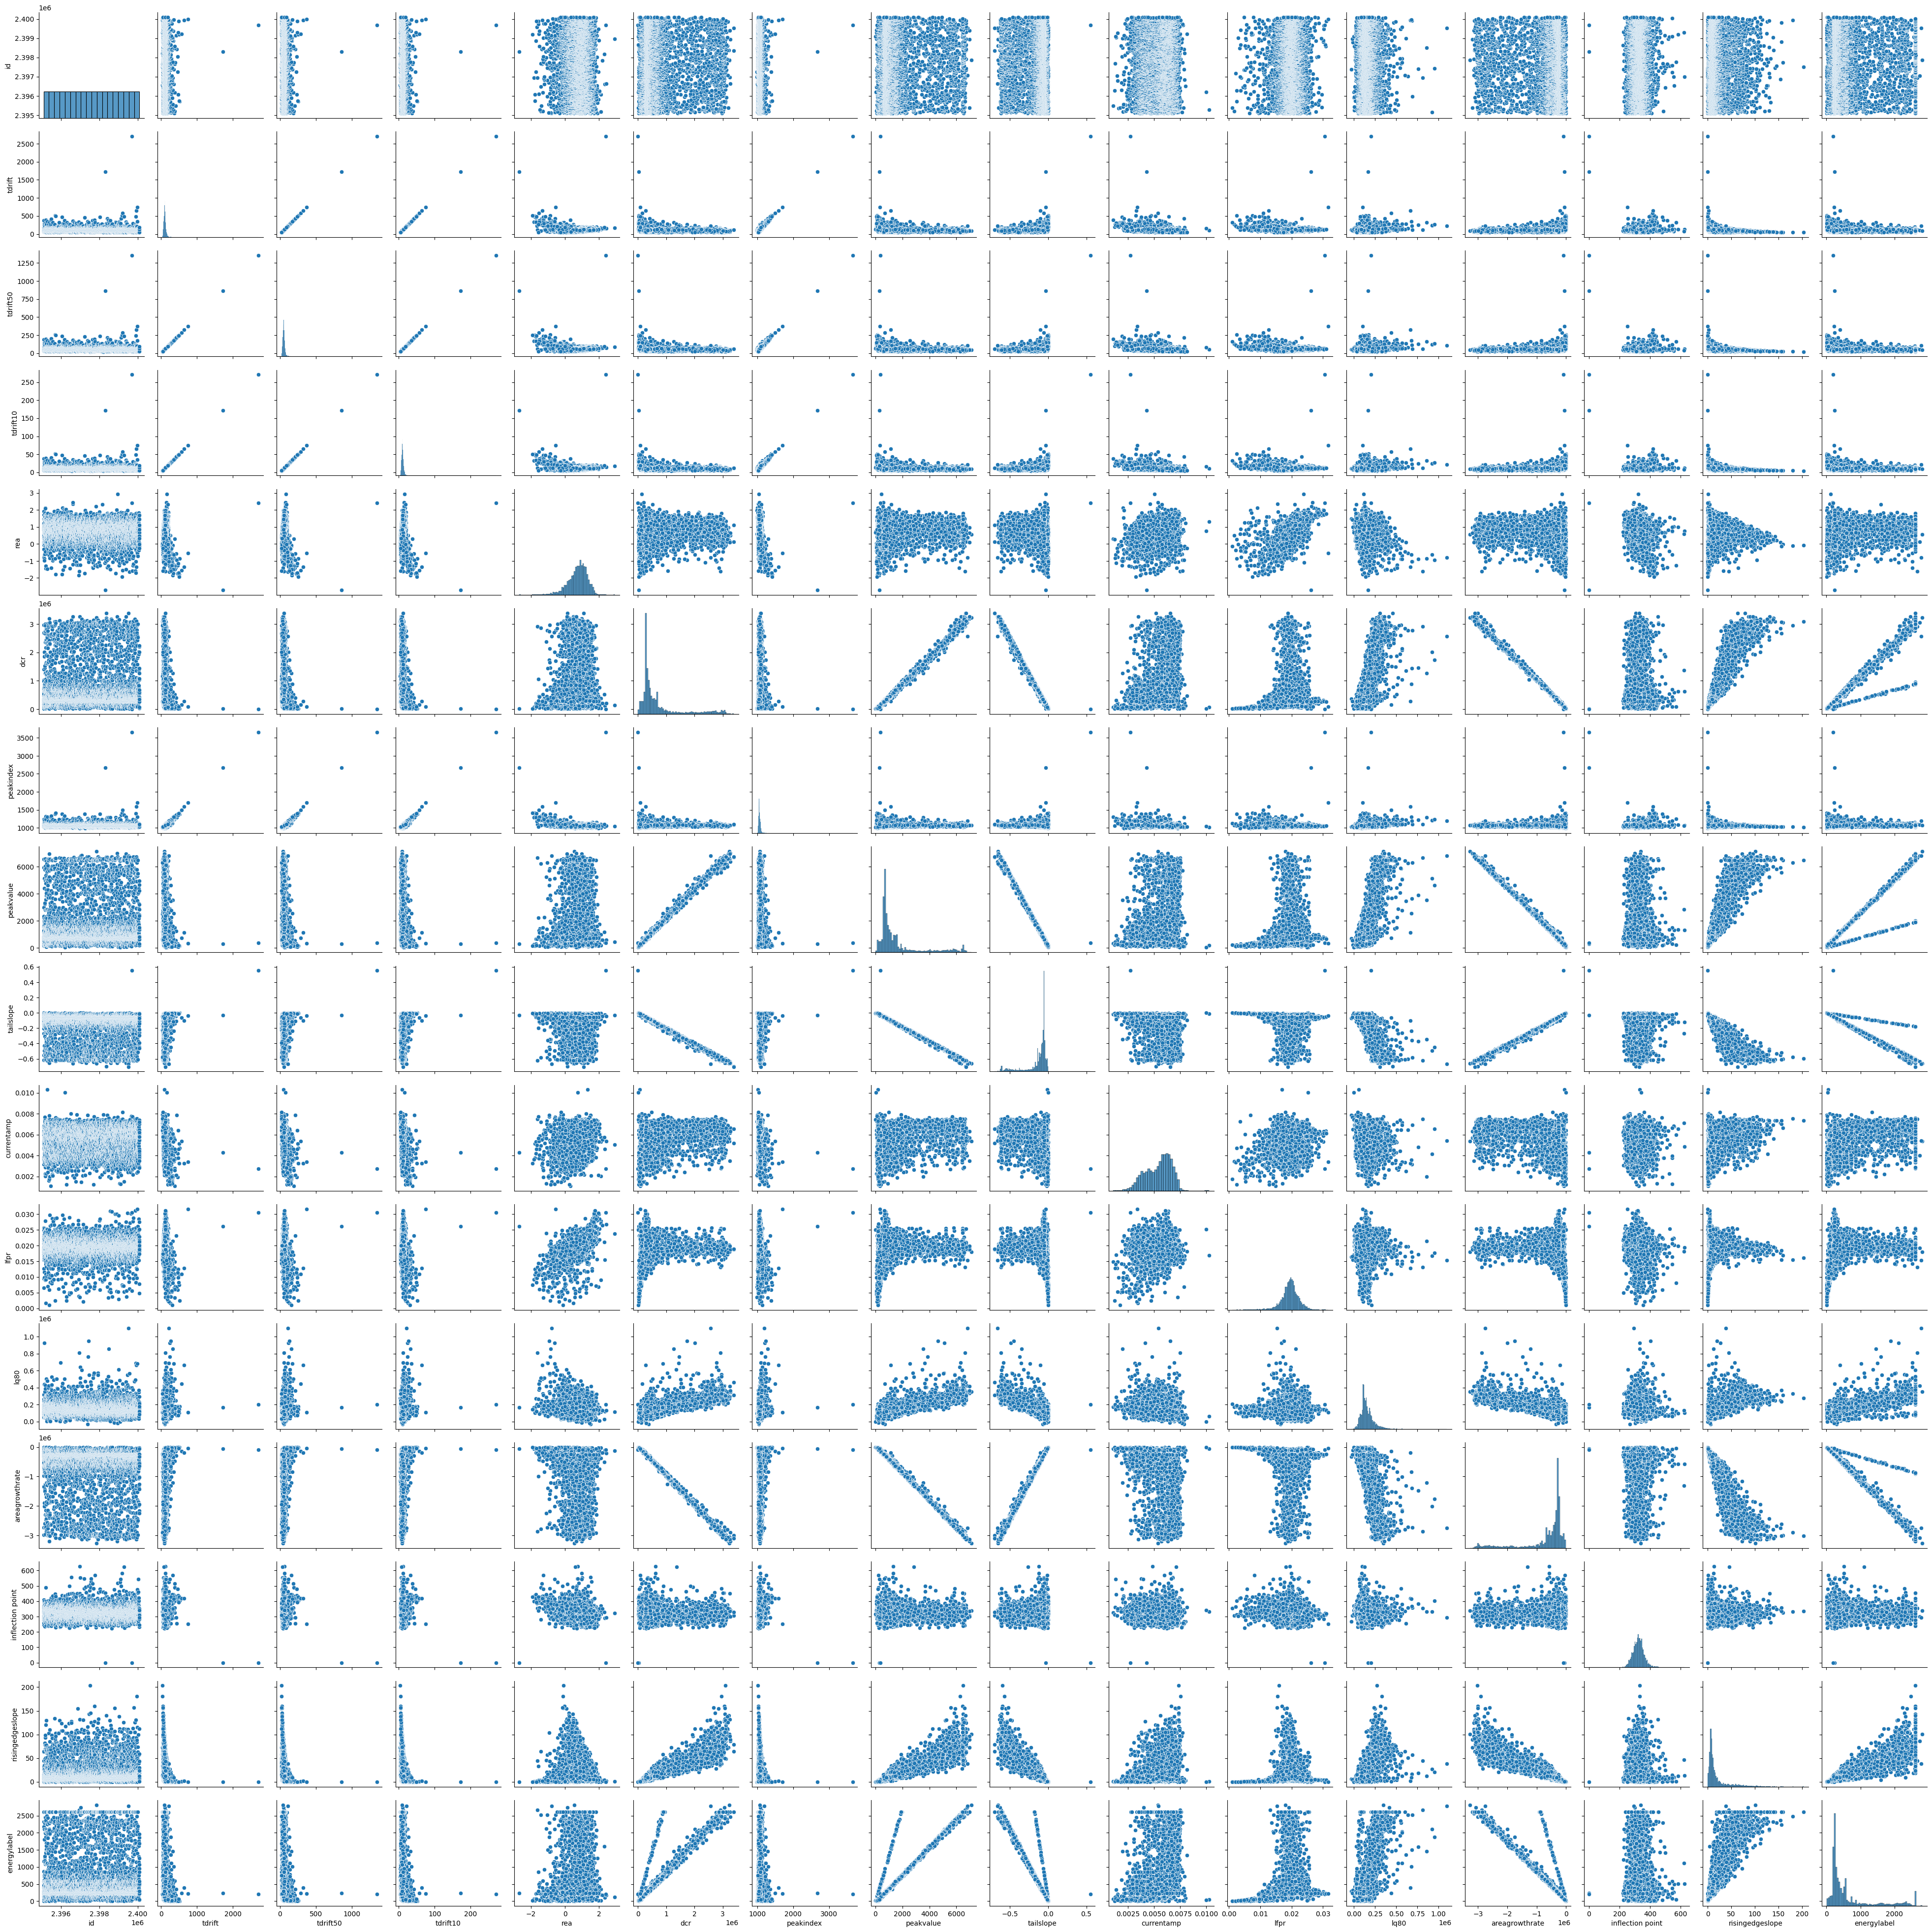

In [23]:
sns.pairplot(first_5000_df)

A pairplot is generated to visualize the correlation between variables. Here we can see that there are strong linear relationships between certain variables whereas the relationship is not so obvious between other variables. 